# Introduction
The idea here is to first put to practice the basic functions that I learned and observe the data as it is.\
Only then I will start making up and answering specific questions about it.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv


In [2]:
# Remember to copy the .csv itself, not the folder
netflix = pd.read_csv("/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv")

In [3]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.isna().sum()
# These are the missing values that will have to be treated

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
netflix.dtypes
# 'Date_added' doesn't have to be a string. 'Duration' should propably be diferentiated for movies and shows.

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
# Rating
netflix[pd.isna(netflix.rating)]
# No clear pattern

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [7]:
# Duration
print(netflix[pd.isna(netflix.duration)])
# !!!
# Rating: "74 min"?
print("")
print(netflix.rating.unique())
# Some durations seem to have seeped into the rating's column. We will have to deal with that.

     show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in                                        description  
5541      NaN    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794      NaN    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813      NaN    Movies  The comic puts his trademark hilarious/thought...  

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84

In [8]:
netflix[pd.isna(netflix.date_added)]
# Also no clear pattern

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


#  Columns
**Categories**

In [9]:
#Type 
netflix.type.value_counts()
# Also no missing values so sounds about right

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [10]:
# Director
netflix.director.value_counts()
# Nothing we can tell from this unless we check each and every name...

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [11]:
# Country
netflix.country.value_counts()
# Nothing we can tell from this unless we check each and every country...

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

In [12]:
# Due to combinations of countries, we have far more unique values than even the amount of countries on Earth
print(len(netflix.country.value_counts()))

748


In [13]:
netflix.rating.value_counts()
# We can also see the misinputed data from here

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [14]:
# But hang on...
netflix[netflix["type"]=='Movie'].rating.value_counts()
# There are plenty of TV ratings mixed in there. They don't seem any different from their counterparts - for example, Tv-G can be turned into G - so maybe
# we can change that later
# (...)
# Upon further inspection, it does seem to be a real phenomenon for some movies to be rated by instituions other than the 
# Motion Picture Association film rating system. As such, I won't make any changes.

rating
TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [15]:
netflix.duration.value_counts()
# We will definitely have to separate the duration column into two, one for movies, one for seasons of TV

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [16]:
netflix.listed_in.value_counts()
# The tags will have to be separated from each other, as they appear in multiple combinations (See "Dramas" in "Dramas, International Movies" and "Dramas, Independent Movies, International Movies" ) 


listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

**Numerical**

In [17]:
# Release Year
netflix.release_year.describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [18]:
# We can't just yet work with the numerical value of the duration/runtime, as it is still merged with the quantity of seasons (also numerical) and is a string

# Cleaning the Data
Let's clean the data before trying to glean information from the data set.

In [19]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [20]:
# Missing directors, cast and countries should be assigned as 'Unknown', as no pattern could be found for why the data was missing.
# I will use a copy that shall be the cleaned version of the original dataset
dfN = netflix
dfN['director'] = netflix['director'].fillna('Unknown')
dfN['cast'] = netflix['cast'].fillna('Unknown')
dfN['country'] = netflix['country'].fillna('Unknown')
dfN.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [21]:
# As we have seen, there are 3 durations that have ended up in ratings. 
dfN[pd.isna(dfN.duration)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [22]:
# They can be sorted out easily enough through manual means:
dfN.loc[5541, 'duration'] = dfN.loc[5541, 'rating']
dfN.loc[5794, 'duration'] = dfN.loc[5794, 'rating']
dfN.loc[5813, 'duration'] = dfN.loc[5813, 'rating']
# We then remove the durations from the ratings column
dfN['rating'] = dfN['rating'].replace(["74 min", "84 min", "66 min"], np.nan)
dfN.loc[[5541,5794,5813]] 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [23]:
# There are 4 missing values left in the ratings columns + the 3 from the above procedure
dfN[pd.isna(dfN.rating)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown,"Oprah Winfrey, Ava DuVernay",Unknown,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Unknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Unknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [24]:
# Since they don't seem unusual, let's assign them "Unknown"
dfN.rating = dfN.rating.fillna('Unknown')
dfN.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

# Transforming Formats

In [25]:
dfN.dtypes
# 'Date_added' should be of a datetime 
# Duration should become an integer once separated between runtime and quantity of seasons

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [26]:
dfN['date_added'] = pd.to_datetime(dfN['date_added'], format='%B %d, %Y', errors = 'coerce')
dfN.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [27]:
dfN.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

# Creating New Columns
Movie and Show duration

In [28]:
# We now create a column for movie duration based on the strings with the substring " min", thus excluding the durations counted in seasons
dfN['duration_movies'] = dfN['duration'].apply(lambda x: x if "min" in x else None)
# We then remove the " min" part from the strings and turn them into integers
dfN['duration_movies'] = dfN['duration_movies'].str.replace(' min', '', regex=False).astype('Int64')
dfN.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_movies
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",<NA>
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,<NA>
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",<NA>
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,<NA>


In [29]:
# Now we to the same for the duration of shows
dfN['duration_shows'] = dfN['duration'].apply(lambda x: x if "Season" in x else None) # Notice "Season" captures "Seasons" too
dfN['duration_shows'] = dfN['duration_shows'].str.replace(' Season', '', regex=False)
dfN['duration_shows'] = dfN['duration_shows'].str.replace('s', '', regex=False) # The plural 's' is all that's left after the previous line of code
dfN['duration_shows'] = pd.to_numeric(dfN['duration_shows'], errors='coerce').astype('Int64')
dfN.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_movies,duration_shows
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,<NA>
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",<NA>,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,<NA>,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",<NA>,1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,<NA>,2


In [30]:
# Both are integers. It should be noted that the missing values should be considered when making analysis. For instance, to study the tags's association with release year *for movies*, one should ignore all of the shows
dfN.dtypes

show_id                    object
type                       object
title                      object
director                   object
cast                       object
country                    object
date_added         datetime64[ns]
release_year                int64
rating                     object
duration                   object
listed_in                  object
description                object
duration_movies             Int64
duration_shows              Int64
dtype: object

**Genre tags -----------------------------------------------------------------------**

In [31]:
# It is difficult to separate so many genre tags into different columns, even when accounting for the fact that there are different combinations
# We can therefore create a separate series in order to at least investigate the frequency of each genre
genres = dfN['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)
top_genres

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

In [32]:
# This is fine, but we can separate movies from shows
# Movies
dfNM = dfN[dfN['duration_movies'].notna()]
#dfNM.head()
#dfNM['duration_movies'].isna().sum() # = 0
genresM = dfNM['listed_in'].str.split(', ').explode()
genresM.head(10)
top_genresM = genresM.value_counts().head(10)
top_genresM

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: count, dtype: int64

In [33]:
# Shows
dfNS = dfN[dfN['duration_shows'].notna()]
dfNS['listed_in']
genresS = dfNS['listed_in'].str.split(', ').explode()
genresS.head(10)
top_genresS = genresS.value_counts().head(10)
top_genresS

listed_in
International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
Docuseries                 395
Romantic TV Shows          370
Reality TV                 255
British TV Shows           253
Anime Series               176
Name: count, dtype: int64

# Explanatory Analysis
**Genre Tags**

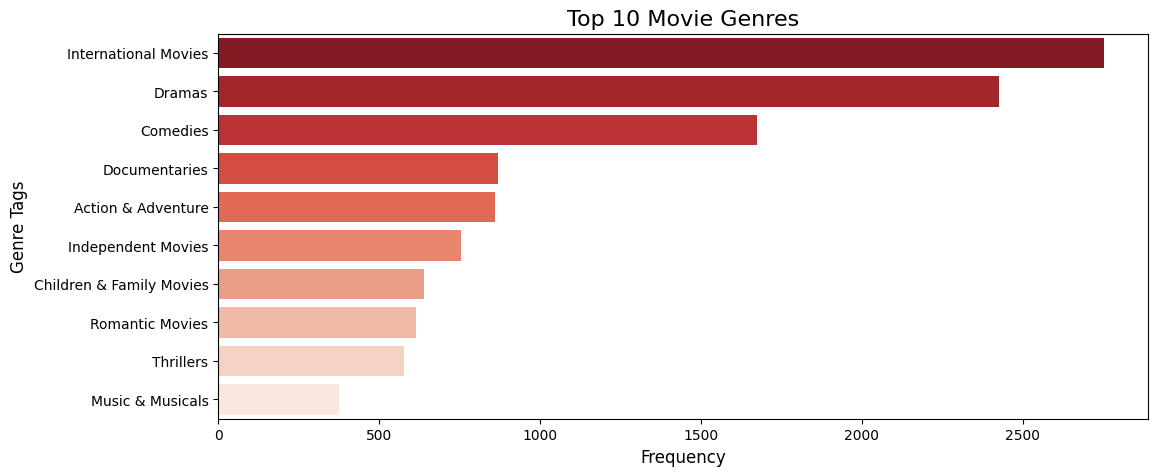

In [34]:
# Let's start with the genre series that we have just created
plt.figure(figsize=(12, 5))
sns.barplot(x=top_genresM.values, y=top_genresM.index, palette='Reds_r')
plt.title('Top 10 Movie Genres', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Genre Tags', fontsize=12)
plt.show()

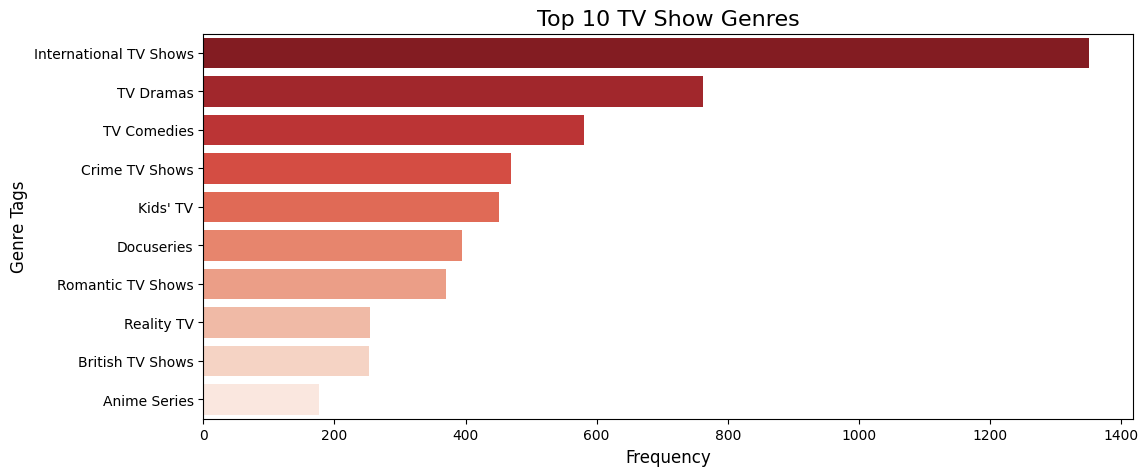

In [35]:
plt.figure(figsize=(12, 5))
sns.barplot(x=top_genresS.values, y=top_genresS.index, palette='Reds_r')
plt.title('Top 10 TV Show Genres', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Genre Tags', fontsize=12)
plt.show()

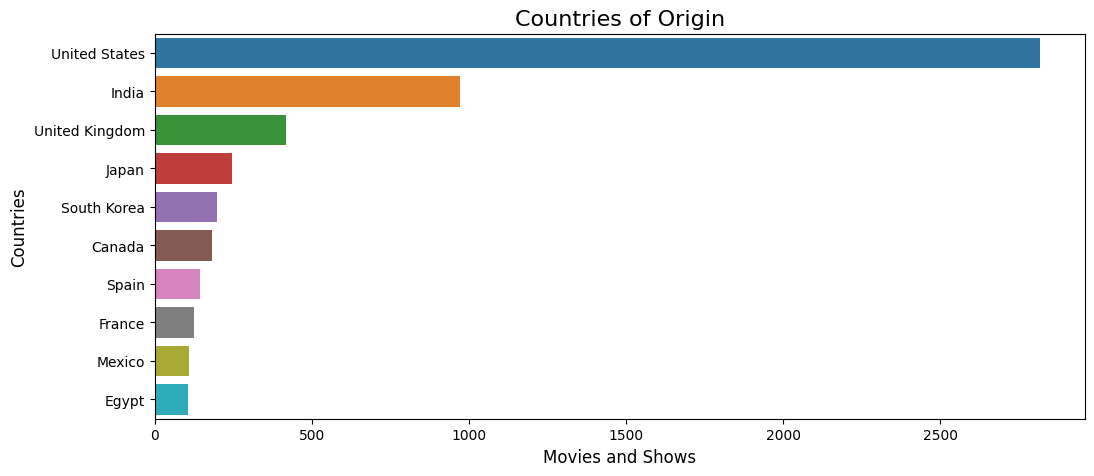

In [36]:
# Country
# If you recall, there were hundreds of unique country values due to combinations. Let's focus on the top 10 then.
plt.figure(figsize=(12, 5))
#country_count = dfN['country'].value_counts()
country_count = dfN[dfN['country'] != 'Unknown']['country'].value_counts()   # Skipping the missing values represented by 'Unknown'
top_country = country_count.head(10)
sns.barplot(x = top_country.values, y = top_country.index)
plt.title('Countries of Origin', fontsize=16)
plt.xlabel("Movies and Shows", fontsize = 12)
plt.ylabel("Countries", fontsize = 12)
sns.set_style("darkgrid")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

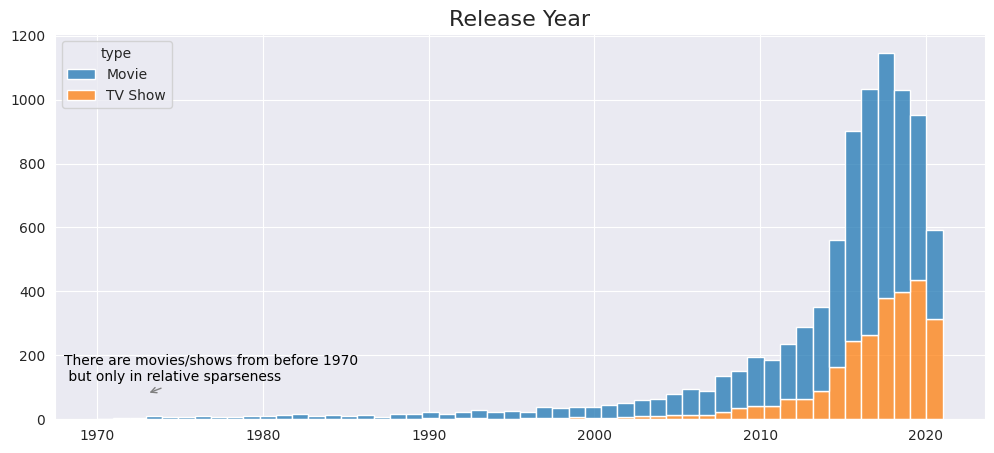

In [37]:
# Release Year
plt.figure(figsize=(12, 5))
sns.histplot(x = 'release_year', data = dfN, 
             binrange = (1970,2021),
             bins = 52,
            hue = 'type',
            multiple = 'stack')
plt.title('Release Year', fontsize=16)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.annotate('There are movies/shows from before 1970\n but only in relative sparseness',
             xy=(1973, 80),            # point to annotate
             xytext=(1968, 120),       # location of the note
             arrowprops=dict(arrowstyle='->', color='gray'),
             fontsize=10, color='black')
sns.set_style("darkgrid")
plt.show();

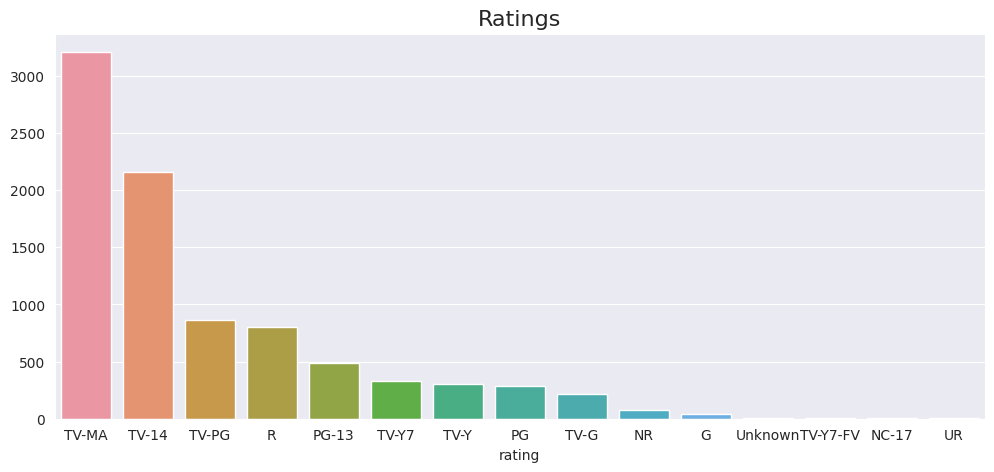

In [38]:
# Rating distribuition
# We'll be mixing movies and shows together as we have learned that some movies are rated by TV ratings entities
plt.figure(figsize=(12, 5))
ratings_count = dfN['rating'].value_counts()
sns.barplot(x = ratings_count.index, y = ratings_count.values)
plt.title('Ratings', fontsize=16)
sns.set_style("darkgrid")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


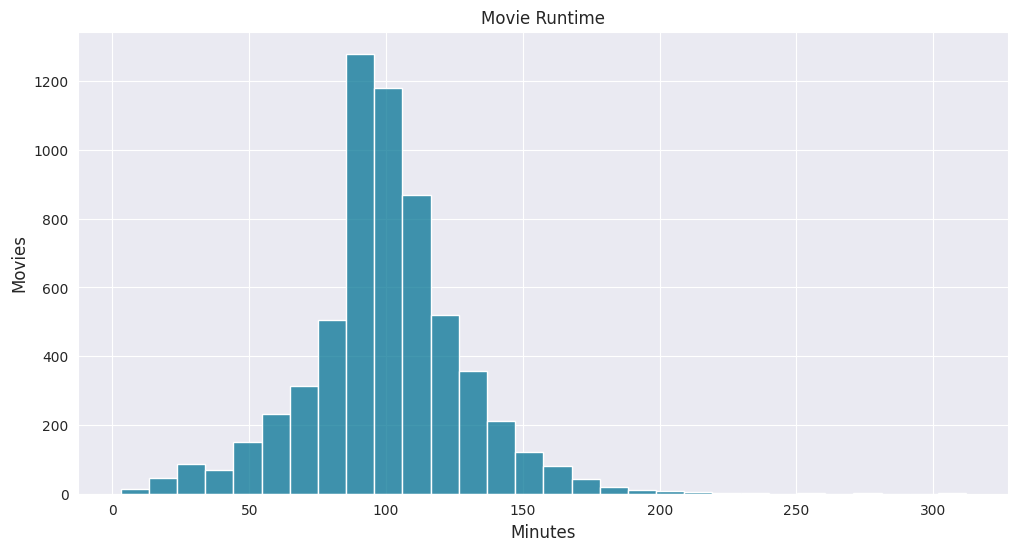

In [39]:
# Movie Duration
plt.figure(figsize = (12,6))
sns.histplot(x = 'duration_movies', data = dfNM,
            bins = 30, color='#047495')
plt.title('Movie Runtime', fontsize=12)
plt.xlabel('Minutes', fontsize=12)
plt.ylabel('Movies', fontsize=12)
sns.set_style("darkgrid");

Text(0, 0.5, 'Minutes')

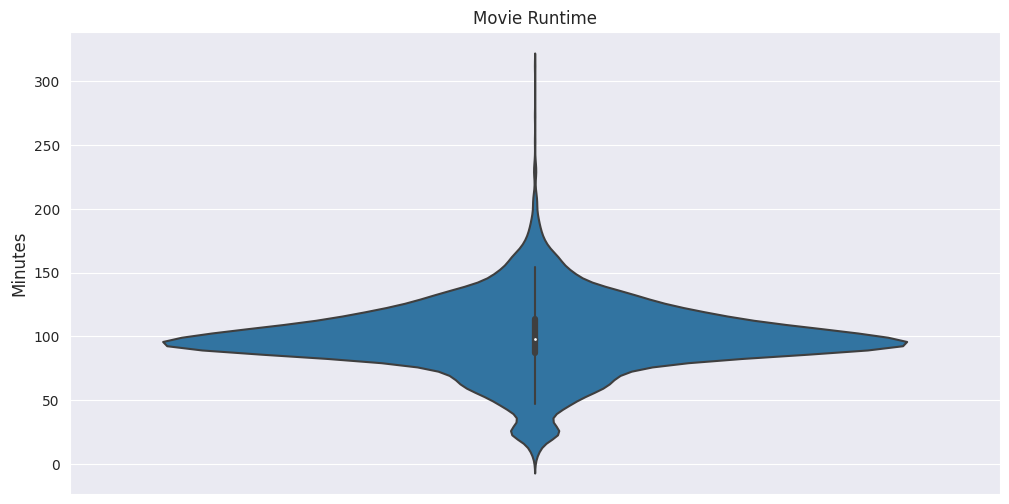

In [40]:
# Another one
plt.figure(figsize = (12,6))
sns.violinplot(y = dfNM['duration_movies'])
plt.title('Movie Runtime', fontsize=12)
plt.ylabel('Minutes', fontsize=12)
#plt.xlabel('Movies', fontsize=12)
#plt.ylim(0,200)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


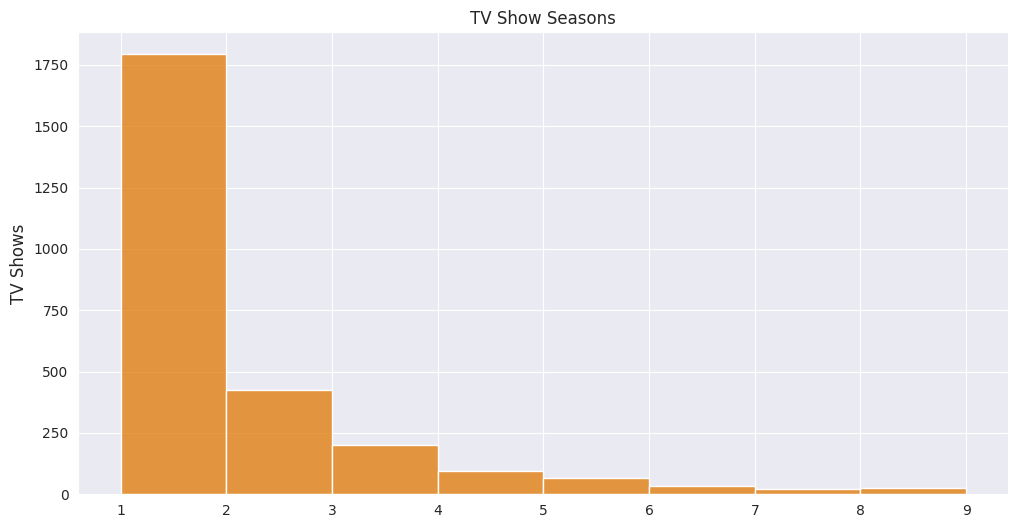

In [41]:
# TV Show Duration
plt.figure(figsize = (12,6))
sns.histplot(x = 'duration_shows', data = dfNS,
            binrange = (1,9),
            binwidth = 1,
            color='#e17701')
plt.title('TV Show Seasons', fontsize=12)
plt.xlabel('', fontsize=12)
plt.ylabel('TV Shows', fontsize=12)
sns.set_style("darkgrid")

# Multivariate Analysis
Let's investigate the relationships between different features
* Type and Country (Which type of content is each country most likely to produce?) X
* Country and Release Year (What are the international trends for content creation?) X
* Country and Date_added (What are the international trends for inclusion to Netflix's catalogue?) X
* Country and Movie Duration (Could there be a connection between culture and prefered movie length?) X
* Release Year and Movie Duration (What is the trend for movie duration given that the movie is added to Netflix's catalogue?) X
* Release Year and TV Show Duration (What is the trend for the amount of seasons produced given that the show is added to Netflix's catalogue?) X
* Release Year and Genre (What are the trends for the most popular genres in Netflix?)
* Rating and Genre (Could there be a connection between ratings and genre?)
* Movie Duration and Genre (Could there be a connection between movie duration and genre?)
* TV Show Duration and Genre (Could there be a connection between tv show duration and genre?)

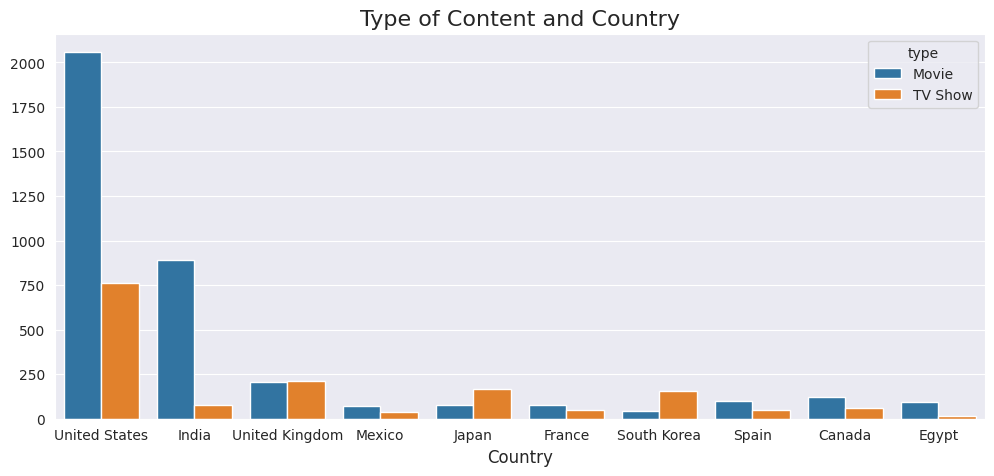

In [42]:
# Type and Country
top10 = dfN[dfN['country'] != 'Unknown']['country'].value_counts().head(10).index  #Skipping 'Unknown'
#top10
df_top10 = dfN[dfN['country'].isin(top10)]
#df_top10.head(10)
#
plt.figure(figsize=(12, 5))
sns.countplot(data=df_top10, x='country', hue='type')
plt.title('Type of Content and Country', fontsize=16)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("", fontsize = 12)
sns.set_style("darkgrid")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

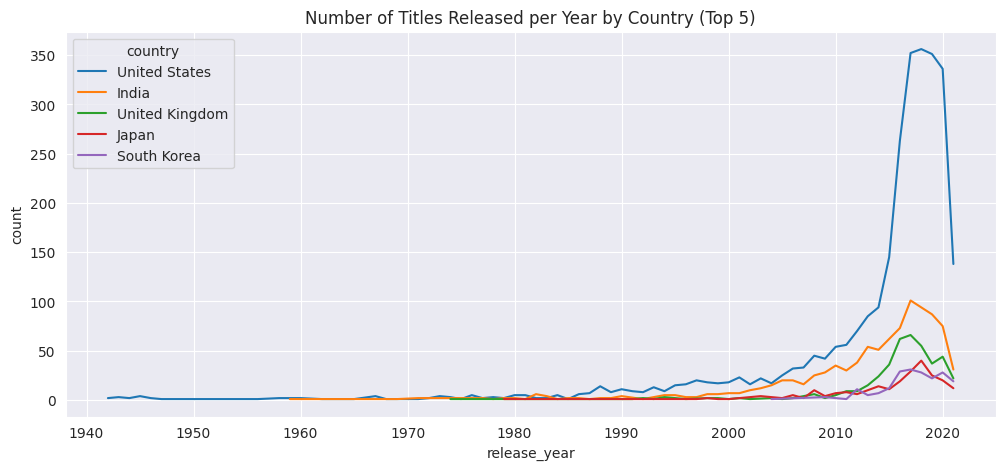

In [43]:
# Country and Release Year
# Preparations
top_n = 5  # You can change this value
top_countries = dfN[dfN['country'] != 'Unknown']['country'].value_counts().head(top_n).index  # Skipping 'Unknown'
df_top = dfN[dfN['country'].isin(top_countries)]
df_top.head(10)
grouped = df_top.groupby(['release_year', 'country']).size().reset_index(name='count')
# The Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=grouped, x='release_year', y='count', hue='country')
plt.title(f'Number of Titles Released per Year by Country (Top {top_n})')
sns.set_style("darkgrid")
plt.show();

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

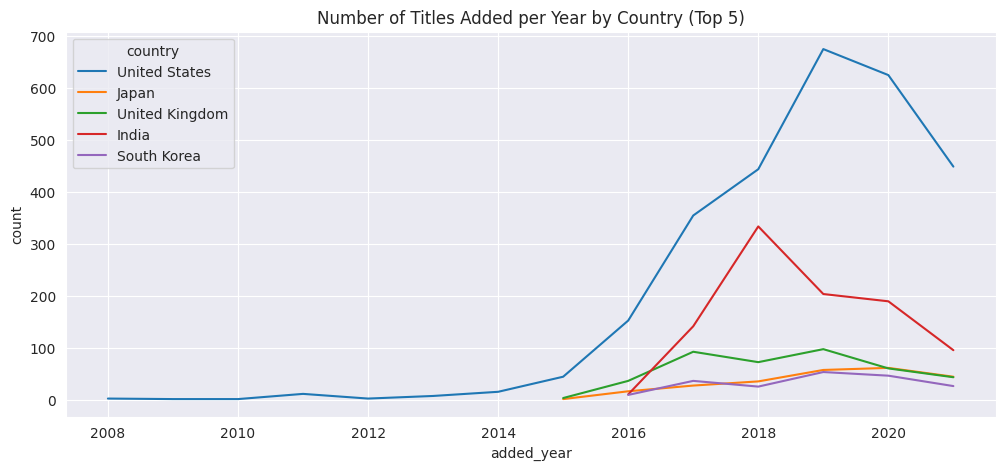

In [44]:
# Country and Date Added
# Preparations
dfN['added_year'] = dfN['date_added'].dt.year
top_n = 5  # You can change this value
top_countries = dfN[dfN['country'] != 'Unknown']['country'].value_counts().head(top_n).index  # Skipping 'Unknown'
df_top = dfN[dfN['country'].isin(top_countries)]
df_top.head(10)
grouped = df_top.groupby(['added_year', 'country']).size().reset_index(name='count')
# The Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=grouped, x='added_year', y='count', hue='country')
plt.title(f'Number of Titles Added per Year by Country (Top {top_n})')
sns.set_style("darkgrid")
plt.show();

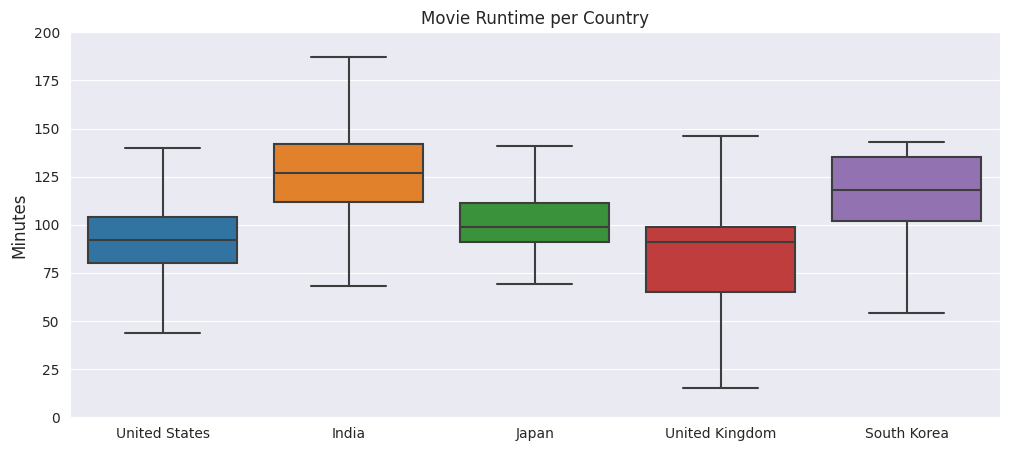

In [45]:
# Country and (Average) Movie Duration
plt.figure(figsize=(12, 5))
sns.boxplot(x = 'country', y = 'duration_movies', data = df_top[df_top['type'] == "Movie"], 
            showfliers= False)
plt.title('Movie Runtime per Country', fontsize=12)
plt.ylim(0,200)
plt.ylabel('Minutes', fontsize=12)
plt.xlabel('', fontsize=12)
sns.set_style("darkgrid");

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


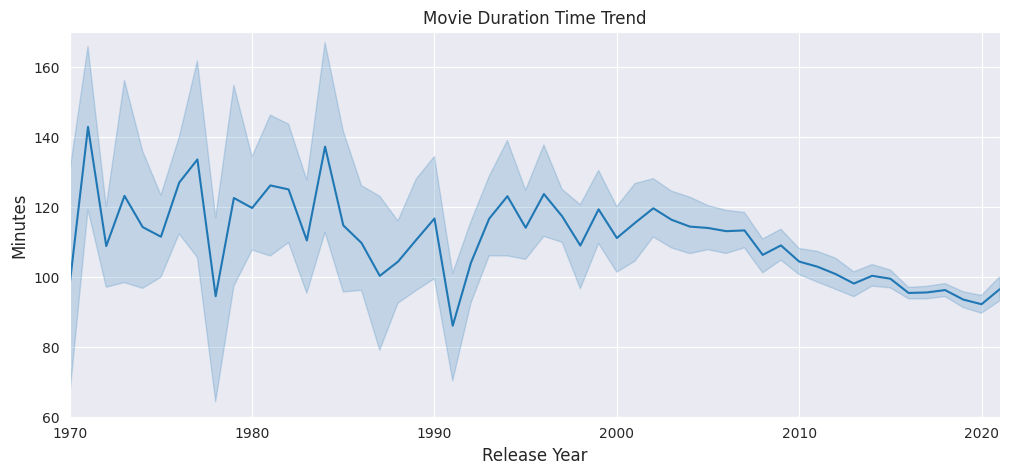

In [46]:
# Release Year and Movie Duration
plt.figure(figsize=(12, 5))
sns.lineplot(data=dfNM, x='release_year', y = 'duration_movies', estimator = 'mean')
plt.title('Movie Duration Time Trend')
sns.set_style("darkgrid")
plt.xlim(1970,2021)
plt.ylim(60,170)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Minutes', fontsize=12)
plt.show();

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


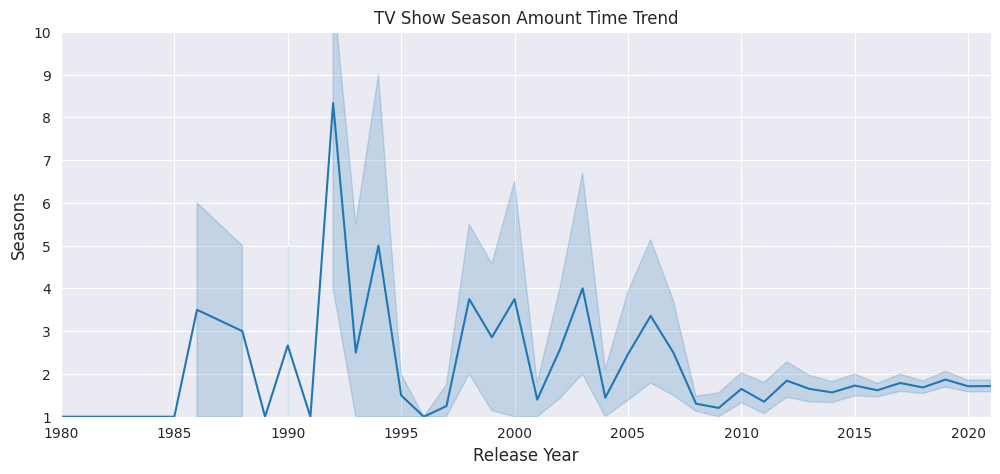

In [47]:
# Release Year and Tv Show Duration
plt.figure(figsize=(12, 5))
sns.lineplot(data=dfNS, x='release_year', y = 'duration_shows', estimator = 'mean')
plt.title('TV Show Season Amount Time Trend')
sns.set_style("darkgrid")
plt.xlim(1980,2021)
plt.ylim(1,10)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Seasons', fontsize=12)
plt.show();
# Perhaps making it per 5 year periods would be more readable...